 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [150]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [151]:
csv_path_w = "C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/Whale/whale_returns.csv"
whale_returns = pd.read_csv(
    csv_path_w, parse_dates=True, index_col="Date", infer_datetime_format=True
)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [152]:
# Reading whale returns
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [153]:
# Count nulls
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [154]:
# Drop nulls
whale_returns=whale_returns.dropna()

In [155]:

csv_path_a = "C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/Whale/algo_returns.csv"
algo_returns = pd.read_csv(
    csv_path_a, parse_dates=True, index_col="Date", infer_datetime_format=True
)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [156]:
# Reading algorithmic returns
algo_returns.columns=["Algo_1", "Algo_2"]
algo_returns.head()

,Algo_1,Algo_2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [157]:
# Count nulls
algo_returns.isnull().mean() * 100

Algo_1    0.000000
Algo_2    0.483481
dtype: float64

In [158]:
# Drop nulls
algo_returns=algo_returns.dropna()

In [159]:

csv_path_s = "C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/Whale/sp500_history.csv"
sp500_history = pd.read_csv(csv_path_s)
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [160]:
# Reading S&P 500 Closing Prices
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [161]:
# See shape of data
sp500_history.shape

(1649, 2)

In [162]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [163]:
# Fix Data Types
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.sort_index(inplace=True)
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close'] = sp500_history['Close'].astype('float')

# Drop the extra date column
sp500_history.drop(columns = ['Date'], inplace=True)
sp500_history.head()

C:\Users\CS_Knit_tinK_SC\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [164]:
# Calculate Daily Returns

sp500_returns = sp500_history.pct_change()

In [165]:
# Drop nulls
sp500_history = sp500_history.dropna()

In [166]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ["SP500"] 

## Combine Whale, Algorithmic, and S&P 500 Returns

In [167]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([algo_returns, whale_returns, sp500_returns], axis='columns', join = 'inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

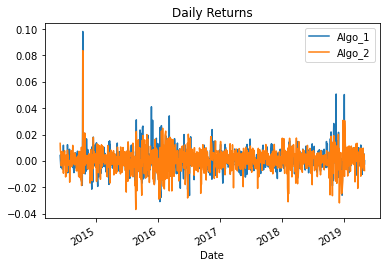

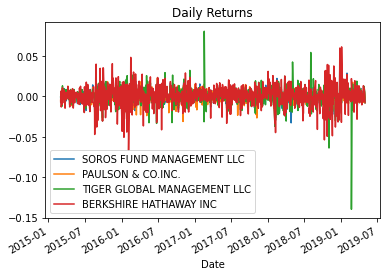

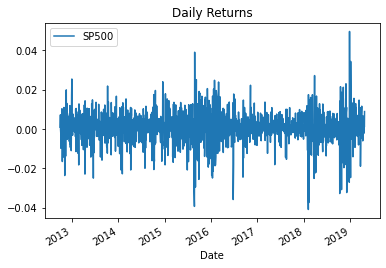

In [168]:
# Plot daily returns of all portfolios
algo_returns.plot(title="Daily Returns")
whale_returns.plot(title="Daily Returns")
sp500_returns.plot(title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

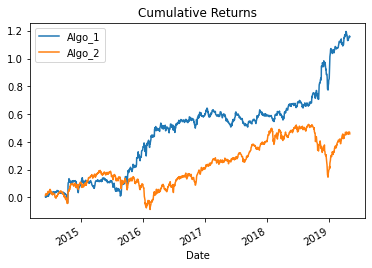

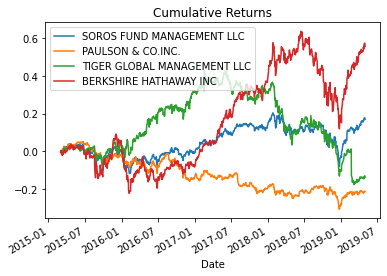

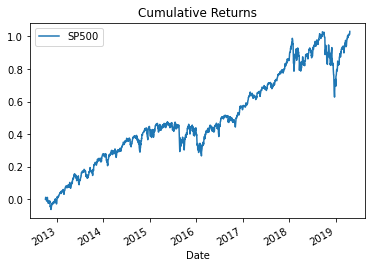

In [169]:
# Calculate cumulative returns of all portfolios
cumulative_algo_returns = (1 + algo_returns).cumprod() - 1
cumulative_whale_returns = (1 + whale_returns).cumprod() - 1
cumulative_sp500_returns = (1 + sp500_returns).cumprod() - 1


# Plot cumulative returns

cumulative_algo_returns.plot(title="Cumulative Returns")
cumulative_whale_returns.plot(title="Cumulative Returns")
cumulative_sp500_returns.plot(title="Cumulative Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk per Portfolio Box Plot'}>

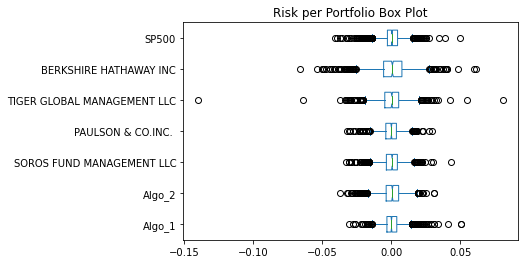

In [170]:
# Box plot to visually show risk

all_returns.plot.box(notch='True', vert = 0, title="Risk per Portfolio Box Plot")


### Calculate Standard Deviations

In [171]:
# Calculate the daily standard deviations of all portfolios

daily_std = all_returns.std()
print(f' The standard deviations for each portfolio are: \n{daily_std}')

 The standard deviations for each portfolio are: 
Algo_1                         0.007620
Algo_2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
SP500                          0.008554
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [172]:
# Calculate  the daily standard deviation of S&P 500

daily_std = daily_std.sort_values(ascending=False)



# Determine which portfolios are riskier than the S&P 500
print(f' The sorted daily Standard deviations are: \n{daily_std}')
print(f'Berkshire Hathaway (.012919) and Tiger Global (.010894) are riskier than the S&P 500')



 The sorted daily Standard deviations are: 
BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo_2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo_1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64
Berkshire Hathaway (.012919) and Tiger Global (.010894) are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [173]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)

print(f' The annualized standard deviations for each portfolio are: \n{annualized_std}')

 The annualized standard deviations for each portfolio are: 
BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo_2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo_1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation (21-day window)'}, xlabel='Date'>

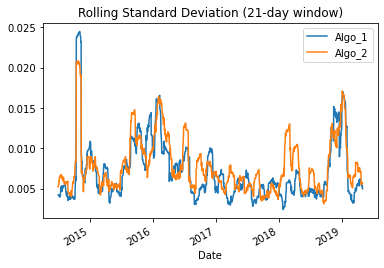

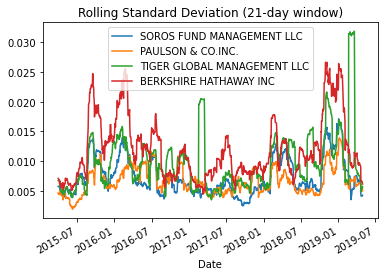

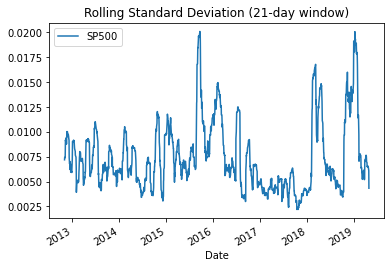

In [174]:
#daily_std = all_returns.std()  data set from earlier step

# Plot a rolling 7-day std dev of TSLA's closing prices  method instruction from class exercise
#tsla_df.rolling(window=7).std().plot()                  method used in class exercise

#all_returns_21_df.rolling(window=21).std()   feels like giving it a different name would be better, but I guess not in this case!

# also - have to do for individual stocks (right! of course!) not whole grouped set..

# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation using 21-day window
algo_returns.rolling(window=21).std().plot(title="Rolling Standard Deviation (21-day window)")
whale_returns.rolling(window=21).std().plot(title="Rolling Standard Deviation (21-day window)")
sp500_returns.rolling(window=21).std().plot(title="Rolling Standard Deviation (21-day window)")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Portfolio Correlations'}>

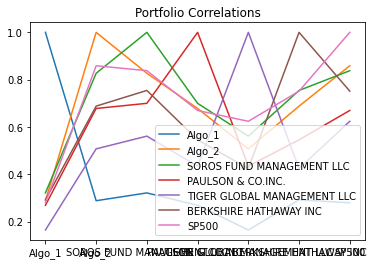

In [175]:
# Calculate the correlation
correlation = all_returns.corr()
# Display the correlation matrix
correlation
correlation.plot(title="Portfolio Correlations")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

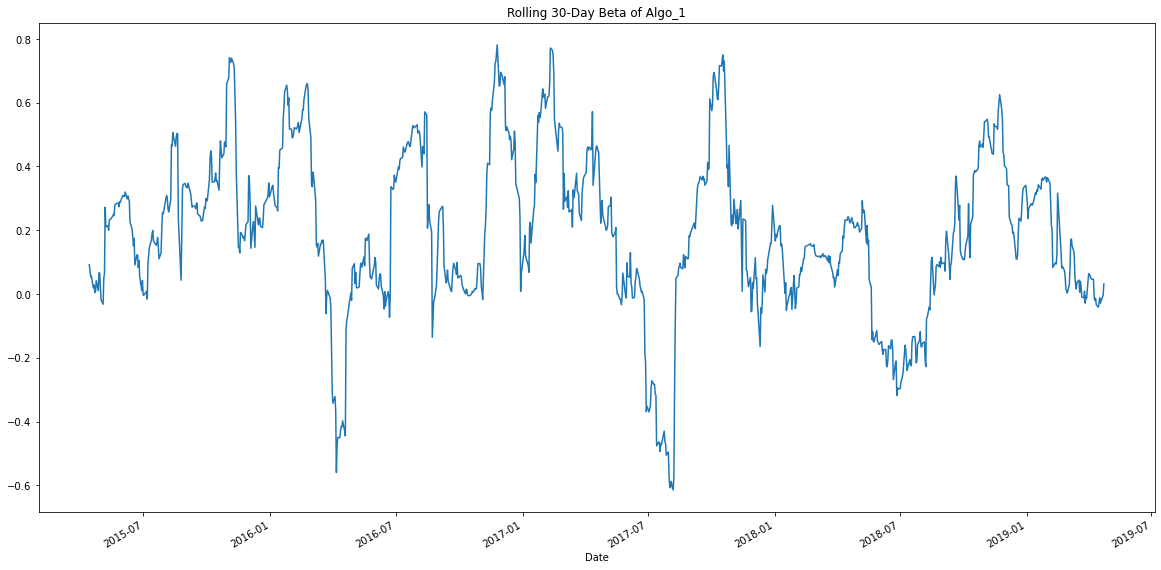

In [176]:
# Calculate covariance of a single portfolio
covariance = all_returns['Algo_1'].cov(all_returns['SP500'])
# Calculate variance of S&P 500
variance = all_returns['SP500'].var()
# Computing beta
Algo1_beta = covariance/variance

# Plot beta trend
rolling_Algo1_covariance = all_returns['Algo_1'].rolling(window=30).cov(all_returns['SP500'])
rolling_variance = all_returns['SP500'].rolling(window=30).var()
rolling_Algo1_beta = rolling_Algo1_covariance / rolling_variance
ax = rolling_Algo1_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo_1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling Window via EWM'}, xlabel='Date'>

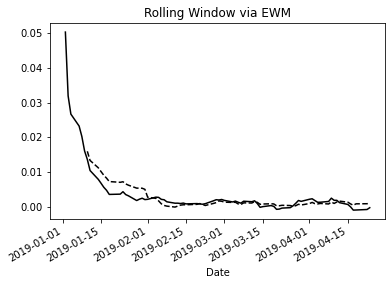

In [177]:
# Use `ewm` to calculate the rolling window

# no luck so far!

    
# code from P4DA:
#aapl_px = close_px.AAPL['2006' : '2007']
#ma60 = aapl_px.rolling(30, min_periods=20).mean()
#ewma60 = aapl_px.ewm(span=30).mean()
#ma60.plot(style='k--', label='Simple MA')
#ewma60.plot(style='k-', label='EW MA')

Algo1_px = all_returns.Algo_1['2019' : '2021']


ma21 = Algo1_px.rolling(21, min_periods=7).mean()


ewma21 = Algo1_px.ewm(span=21).mean()


ma21.plot(style='k--', label='Simple MA')


ewma21.plot(style='k-', label='EW MA', title="Rolling Window via EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [206]:
# Annualized Sharpe Ratios

# Calculate sharpe ratio
#sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
#sharpe_ratios.head()


sharpe_ratios = (all_returns.mean() * 252)/(daily_std * np.sqrt(252))

#print(sharpe_ratios)
print(f' Sharpe Ratios: \n{sharpe_ratios} \n Note: currently risk-free return is numerically similar to zero, so not included. \n')

 Sharpe Ratios: 
Algo_1                         1.378648
Algo_2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
SOROS FUND MANAGEMENT LLC      0.356417
SP500                          0.648267
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64 
 Note: currently risk-free return is numerically similar to zero, so not included. 



<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

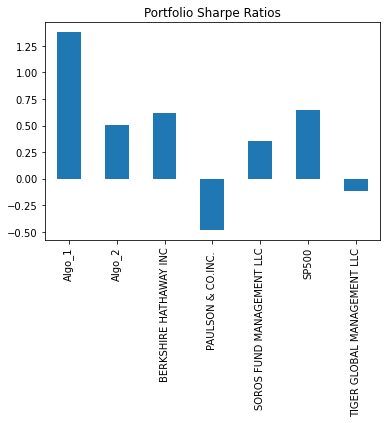

In [179]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Portfolio Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [180]:
# Reading data from 1st stock

# Reading data from 1st stock 
csv_path_g = "C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/Whale/yr_goog15.csv"
yr_goog = pd.read_csv(
    csv_path_g, parse_dates=True, index_col="Date", infer_datetime_format=True
)
print(yr_goog.head)
yr_goog=yr_goog.dropna()
yr_goog.columns = ["Google"] 
yr_goog.dtypes


<bound method NDFrame.head of                       Close
Date                       
2015-01-02 16:00:00  523.37
2015-01-05 16:00:00  512.46
2015-01-06 16:00:00  500.59
2015-01-07 16:00:00  499.73
2015-01-08 16:00:00  501.30
...                     ...
NaT                     NaN
NaT                     NaN
NaT                     NaN
NaT                     NaN
NaT                     NaN

[1757 rows x 1 columns]>


Google    float64
dtype: object

In [181]:
# Reading data from 2nd stock

csv_path_a = "C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/Whale/yr_aapl15.csv"
yr_aapl = pd.read_csv(
    csv_path_a, parse_dates=True, index_col="Date", infer_datetime_format=True
)
print(yr_aapl.head)
yr_aapl=yr_aapl.dropna()
yr_aapl.columns = ["Apple"] 
yr_aapl.dtypes

<bound method NDFrame.head of                      Close
Date                      
2015-01-02 16:00:00  27.33
2015-01-05 16:00:00  26.56
2015-01-06 16:00:00  26.57
2015-01-07 16:00:00  26.94
2015-01-08 16:00:00  27.97
...                    ...
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN

[1757 rows x 1 columns]>


Apple    float64
dtype: object

In [182]:
# Reading data from 3rd stock

csv_path_c = "C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/Whale/yr_cost15.csv"
yr_cost = pd.read_csv(
    csv_path_c, parse_dates=True, index_col="Date", infer_datetime_format=True
)
print(yr_cost.head)
yr_cost.dtypes
yr_cost=yr_cost.dropna()
yr_cost.columns = ["CostCo"] 
print(yr_cost.head)

<bound method NDFrame.head of                       Close
Date                       
2015-01-02 16:00:00  141.61
2015-01-05 16:00:00  140.00
2015-01-06 16:00:00  141.85
2015-01-07 16:00:00  144.32
2015-01-08 16:00:00  145.56
...                     ...
NaT                     NaN
NaT                     NaN
NaT                     NaN
NaT                     NaN
NaT                     NaN

[1757 rows x 1 columns]>
<bound method NDFrame.head of                      CostCo
Date                       
2015-01-02 16:00:00  141.61
2015-01-05 16:00:00  140.00
2015-01-06 16:00:00  141.85
2015-01-07 16:00:00  144.32
2015-01-08 16:00:00  145.56
...                     ...
2019-12-23 16:00:00  293.31
2019-12-24 13:00:00  294.23
2019-12-26 16:00:00  295.73
2019-12-27 16:00:00  294.11
2019-12-30 16:00:00  295.14

[1257 rows x 1 columns]>


In [183]:
# Combine all stocks in a single DataFrame
yr_all = pd.concat([yr_goog, yr_aapl, yr_cost], axis='columns', join = 'inner')



yr_all.head()

,Google,Apple,CostCo
Date,,,
2015-01-02 16:00:00,523.37,27.33,141.61
2015-01-05 16:00:00,512.46,26.56,140.00
2015-01-06 16:00:00,500.59,26.57,141.85
2015-01-07 16:00:00,499.73,26.94,144.32
2015-01-08 16:00:00,501.30,27.97,145.56


In [184]:
# Reset Date index

# not sure how this is to be written..

#yr_all.reindex_like[all_returns]


In [185]:
# Reorganize portfolio data by having a column per symbol
#yr_all.columns=["Google", "Apple", "CostCo"]
# did at different point in process

In [186]:
# Calculate daily returns
yr_all_returns = yr_all.pct_change()

# Drop NAs
yr_all_returns=yr_all_returns.dropna()
yr_all_returns.index=yr_all_returns.index.date
# Display sample data
yr_all_returns.head()

,Google,Apple,CostCo
2015-01-05,-0.020846,-0.028174,-0.011369
2015-01-06,-0.023163,0.000377,0.013214
2015-01-07,-0.001718,0.013925,0.017413
2015-01-08,0.003142,0.038233,0.008592
2015-01-09,-0.012946,0.001073,-0.015389


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [187]:
# Set weights
weights = [1/3, 1/3, 1/3]

goog_weight = 0.33
aapl_weight = 0.33
cost_weight = .34
# Calculate portfolio return

yr_wt_returns = goog_weight * yr_all_returns["Google"] + aapl_weight * yr_all_returns["Apple"] + cost_weight * yr_all_returns["CostCo"]

# Display sample data


print(yr_wt_returns.head)



<bound method NDFrame.head of 2015-01-05   -0.020042
2015-01-06   -0.003027
2015-01-07    0.009949
2015-01-08    0.016575
2015-01-09   -0.009151
                ...   
2019-12-23    0.003449
2019-12-24    0.000100
2019-12-26    0.012417
2019-12-27   -0.004063
2019-12-30   -0.000695
Length: 1256, dtype: float64>


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [188]:
# Join your returns DataFrame to the original returns DataFrame

all_returns.index=all_returns.index.date

total_returns = pd.concat([all_returns, yr_wt_returns], axis='columns', join = 'inner')
total_returns.columns=['Algo_1', 'Algo_2', 'Fund_Mtmg', 'Paulson', 'Global', 'BH', 'SP500', 'Big_3']

total_returns.head()

,Algo_1,Algo_2,Fund_Mtmg,Paulson,Global,BH,SP500,Big_3
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,0.000732
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.002658
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196,0.004822
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.007527
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944,0.004728


In [189]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns=total_returns.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [190]:
# Calculate the annualized `std` (252 trading days, same as earlier)


total_daily_std = total_returns.std()
total_daily_std


Algo_1       0.007620
Algo_2       0.008342
Fund_Mtmg    0.007895
Paulson      0.007023
Global       0.010894
BH           0.012919
SP500        0.008554
Big_3        0.011202
dtype: float64

In [191]:
total_annualized_std = total_daily_std * np.sqrt(252)
total_annualized_std = total_annualized_std.sort_values(ascending=False)
total_annualized_std
print(f' Sorted Total Annualized Standard Deviations are: \n{total_annualized_std}')

 Sorted Total Annualized Standard Deviations are: 
BH           0.205077
Big_3        0.177821
Global       0.172936
SP500        0.135786
Algo_2       0.132430
Fund_Mtmg    0.125335
Algo_1       0.120967
Paulson      0.111488
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

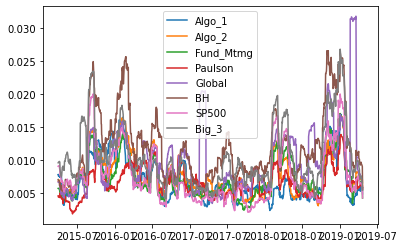

In [192]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

# Plot the rolling standard deviation using 21-day window
total_returns.rolling(window=21).std().plot()




### Calculate and plot the correlation

<AxesSubplot:>

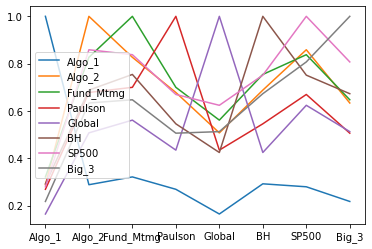

In [193]:
# Calculate and plot the correlation

T_correlation = total_returns.corr()
# Display the correlation matrix
T_correlation
T_correlation.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [195]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance = total_returns['Big_3'].cov(all_returns['SP500'])
# Calculate variance of S&P 500
variance = all_returns['SP500'].var()

# Computing beta
Big_3_beta = covariance/variance
Big_3_beta

1.0571697553510728

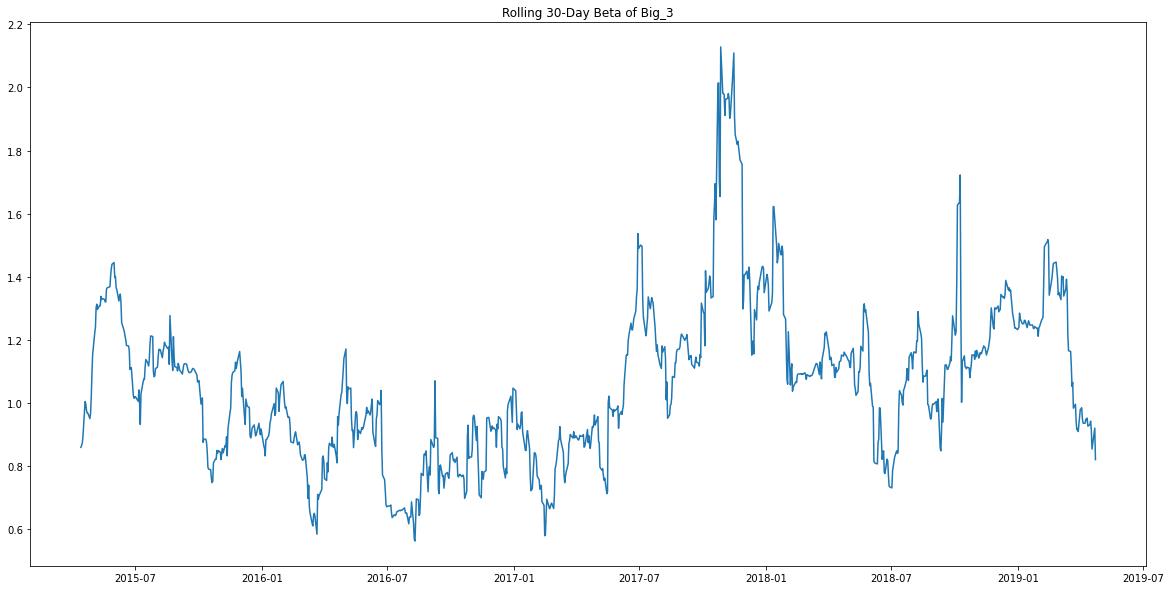

In [196]:


# Plot beta trend
rolling_Big_3_covariance = total_returns['Big_3'].rolling(window=30).cov(all_returns['SP500'])
rolling_variance = all_returns['SP500'].rolling(window=30).var()
rolling_Big_3_beta = rolling_Big_3_covariance / rolling_variance
ax = rolling_Big_3_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Big_3')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [205]:
# Calculate Annualzied Sharpe Ratios

# Annualized Sharpe Ratios

# Calculate sharpe ratio
#sharpe_ratios = (total_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
#sharpe_ratios.head()

#annualized_total_returns = total_returns * np.sqrt(252) -- part done already

# this section is in case new person takes over, and wants to review components of Sharpe Ratios more closely.

#print(f'S.R. num = {total_returns.mean() * 252}')
print(f' These are the Sharpe Ratio numerator values: \n{total_returns.mean() * 252} \n Note: currently risk-free return is numerically similar to zero, so not included. \n')
#print(f'S.R. den = {total_annualized_std}')
print(f' These are the Sharpe Ratio denominator values: \n{total_annualized_std}')


 These are the Sharpe Ratio numerator values: 
Algo_1       0.166771
Algo_2       0.066395
Fund_Mtmg    0.044672
Paulson     -0.053912
Global      -0.020936
BH           0.127519
SP500        0.088026
Big_3        0.168682
dtype: float64 
 Note: currently risk-free return is numerically similar to zero, so not included. 

 These are the Sharpe Ratio denominator values: 
BH           0.205077
Big_3        0.177821
Global       0.172936
SP500        0.135786
Algo_2       0.132430
Fund_Mtmg    0.125335
Algo_1       0.120967
Paulson      0.111488
dtype: float64


In [200]:
total_sharpe_ratios = (total_returns.mean() * 252)/(total_annualized_std)


print(f' Total Sharpe Ratios are: \n{total_sharpe_ratios}')

 Total Sharpe Ratios are: 
Algo_1       1.378648
Algo_2       0.501364
BH           0.621810
Big_3        0.948605
Fund_Mtmg    0.356417
Global      -0.121060
Paulson     -0.483570
SP500        0.648267
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

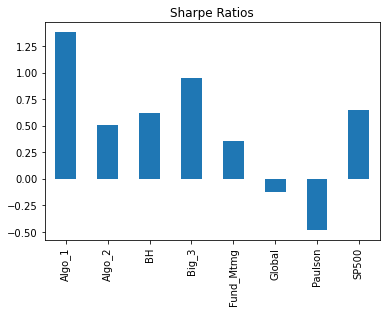

In [199]:
# Visualize the sharpe ratios as a bar plot
total_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [61]:

# My portfolio - The Big 3 - of Apple, Google and Costco performs well. 
# Its Sharpe ratios are inbetween that of the algorithmic-1 portfolio and the algorithmic-2 portfolio.